**Interpolation**

Interpolation which is a technique that allows us to work with multiple signals that are sampled differently in time. 
We saw 2 signals that are both 1 Hz sine waves, but the one that is sampled at 60 Hz has many more data points than the one sampled at 25 Hz. 
After plotting and verifying the lengths of the signals, it might appear that s2_interp and s1 are the same, but it is most certainly not! 
By plotting the original and the interpolated signal together we can see that linear interpolation estimates points 
in between existing points by using a weighted average of the original points.

We've previously discussed how signals are sampled at discrete points in time.
When we want to work with multiple signals that are sampled differently in time, 
we need techniques that allow us to compare them. Interpolation is a technique to estimate a signal at points in time between existing samples.

Let's see how it works.

In [1]:
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
from scipy import signal

In [2]:
%matplotlib inline

Let's create two signals that are exactly the same but with different sampling rates.

In [10]:
fs1 = 60
ts1 = np.arange(0, 10, 1/fs1)
s1 = np.sin(2 * np.pi * 1 * ts1)

fs2 = 25
ts2 = np.arange(0, 10, 1/fs2)
s2 = np.sin(2 * np.pi * 1 * ts2)

Plottings the signals you can see that they are both 1 Hz sine waves, but the one that is sampled at 60 Hz has many more data points than the one sampled at 25 Hz.

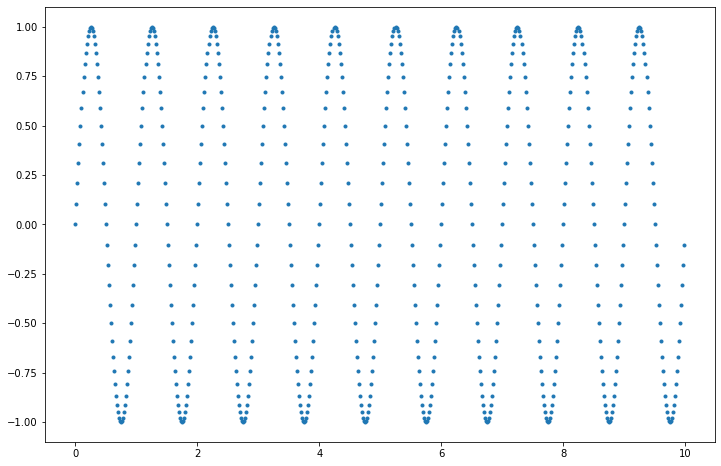

In [11]:
plt.figure(figsize=(12, 8))
plt.plot(ts1, s1, '.')

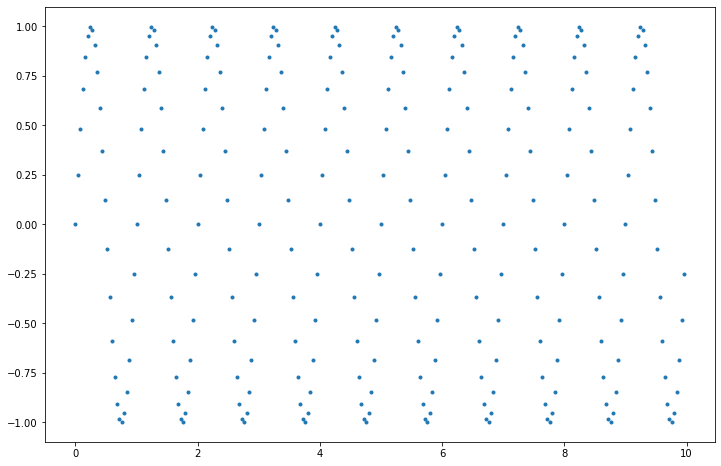

In [12]:
plt.figure(figsize=(12, 8))
plt.plot(ts2, s2, '.')

We can use linear interpolation to approximate what s2 would have been had we sampled it at the same time points as s1.

In [13]:
s2_interp = np.interp(ts1, ts2, s2)

In [14]:
len(s2), len(s1), len(s2_interp)

(250, 600, 600)

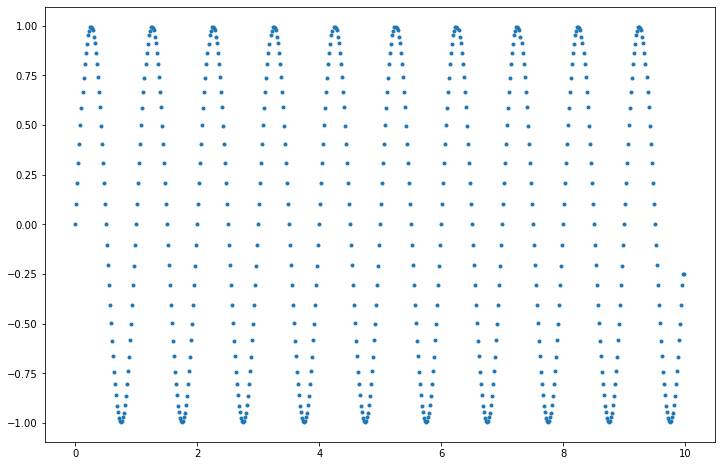

In [15]:
plt.figure(figsize=(12, 8))
plt.plot(ts1, s2_interp, '.')

After plotting and verifying the lengths of the signals, it might appear that s2_interp and s1 are the same. Careful, they are most certainly not!



In [16]:
%matplotlib inline

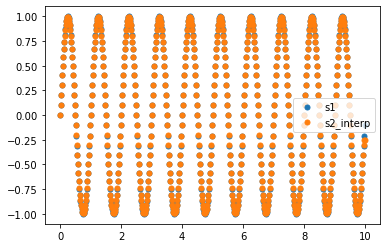

In [17]:
plt.clf()
plt.plot(ts1, s1, '.', ms=10, label='s1')
plt.plot(ts1, s2_interp, '.', ms=10, label='s2_interp')
plt.legend()

By plotting the original and the interpolated signal together we can see that linear interpolation estimates points in between existing points by using a weighted average of the original points.

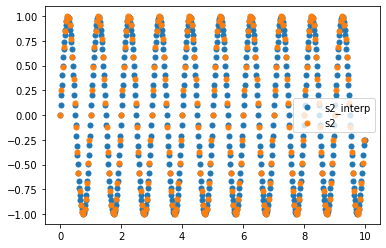

In [18]:
plt.clf()
plt.plot(ts1, s2_interp, '.', ms=10, label='s2_interp')
plt.plot(ts2, s2, '.', ms=10, label='s2')
plt.legend()

### Non-Uniform Sampled Signals


So far, we've only discussed uniformly sampled signals where the signal is sampled at fixed intervals in time. Sometimes we may encounter signals that are sampled haphazardly in time. This is bad because a lot of signal processing techniques that we are about to learn require that the signal is sampled uniformly. We can fix this again with linear interpolation.

In [19]:
%matplotlib inline

Make some continuous signal.

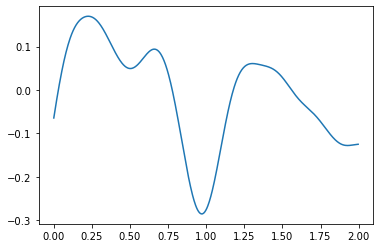

In [21]:
i = 18
np.random.seed(i)
fs = 300
signal = np.random.randn(fs * 2)
orig_ts = np.cumsum(np.ones(len(signal)) * 1/fs) - 1/fs
b, a = sp.signal.butter(3, 2, btype='lowpass', fs=fs)
orig_signal = sp.signal.filtfilt(b, a, signal)
plt.clf()
plt.plot(orig_ts, orig_signal)

Uniformly sample this signal at 30 Hz.

In [22]:
ts = orig_ts[::10]
signal = orig_signal[::10]

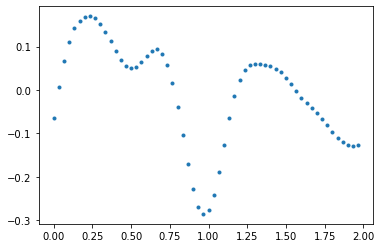

In [23]:
plt.plot(ts, signal, '.')

Randomly sample the continuous signal.

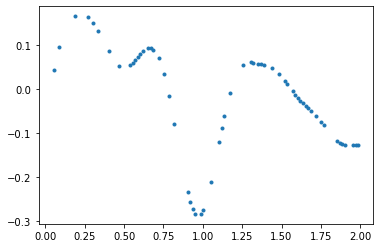

In [24]:
np.random.seed(1)
idx = sorted(np.random.choice(range(len(orig_ts))[6::5], 60, replace=False))
non_uniform_ts = orig_ts[idx]
non_uniform_signal = orig_signal[idx]
plt.plot(non_uniform_ts, non_uniform_signal, '.')

Let's take a closer look at these two discrete-time signals.

In [25]:
%matplotlib inline

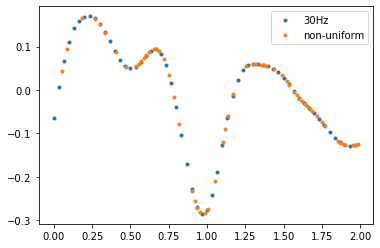

In [26]:
plt.clf()
plt.plot(ts, signal, '.', label='30Hz')
plt.plot(non_uniform_ts, non_uniform_signal, '.', label='non-uniform')
plt.legend()

Interpolate the non-uniform signal onto the same time grid as the uniform 30Hz signal.

In [27]:
rec_sig = np.interp(ts, non_uniform_ts, non_uniform_signal)


Plot the resampled non-uniform signal on top of the original uniformly sampled signal. You can notice artifacts at the edge of the resampled signal, and there is more error when the gap between existing samples is larger.

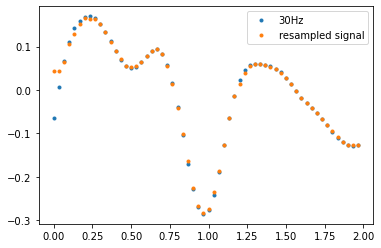

In [28]:
plt.clf()
plt.plot(ts, signal, '.', label='30Hz')
plt.plot(ts, rec_sig, '.', label='resampled signal')
plt.legend()